In [29]:
using Plots
using SpecialFunctions
using LaTeXStrings
using Printf

In [30]:
deltaprimeTF(Q, U) = (π * Q^(5/4) * (-2 + Q^3 * U^2) * gamma((1/4) * (3 + Q^(5/2) * U)) ) /
( (-1 + Q^(5/2) * U) * gamma((1/4) * (1 + Q^(5/2) * U)))

deltaprimeTF (generic function with 1 method)

In [31]:
deltaprimeTF_NC(Q, U) = 2*π*Q^(1/2)*U^(1/4)*gamma( (1/4)*(3+Q/U^(1/2))) / ( (U-Q^2)*gamma( (1/4)*(3+Q/U^(1/2))) );

In [32]:
deltaprimeCoppi(Q) = Q^(5/4)*(-π/8)*gamma((1/4)*(Q^(3/2) - 1)) / gamma((1/4)*(Q^(3/2) + 5));

In [115]:
# Use the GR backend for performance
gr()

# Define parameters
S = 1000

# Define logarithmically spaced grid for Q and U
Qvals = 10 .^ LinRange(-4, -0.000001, 2_000)  # Q spans from 10^-4 to 10^0
# Qvals_SM = 10 .^ LinRange(-4, 4, 2_000) # Q values for Single Mode (SM) case where Δ' ∝ Q^(5/4) w/out bound

Uvals = 10 .^ LinRange(0, 10, 1_000)   # U spans from 10^0 to 10^4

# Create matrices for surface plot
Δ_TF_C = log10.([abs(deltaprimeTF(Q, U)) for Q in Qvals, U in Uvals])  # log10(Δ'/S^(1/3)) Two-Fluid (TF)
Δ_TF_NC = log10.([abs(deltaprimeTF_NC(Q, U)) for Q in Qvals, U in Uvals])  # log10(Δ'/S^(1/3)) Two-Fluid (TF)
Δ_SM = log10.([abs(deltaprimeTF(Q, 0)) for Q in Qvals]) # log10(Δ'/S^(1/3)) Single Mode (SM)
Δ_Coppi = log10.([abs(deltaprimeCoppi(Q)) for Q in Qvals]) # log10(Δ'/S^(1/3)) for Coppi case (Coppi)

logQ = log10.(Qvals);  # log10(Q)
# logQ_SM = log10.(Qvals_SM);

logU = log10.(Uvals);  # log10(U)

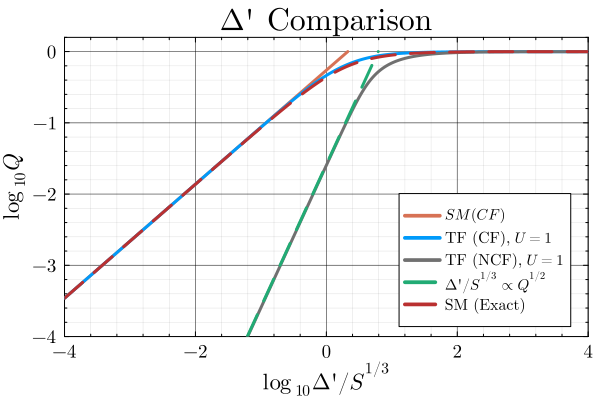

In [143]:
theme(:dao::Symbol)

plot(log10.([abs(deltaprimeTF(Q, 0)) for Q in Qvals]), logQ,
    line=(3,:solid),
    label=L"SM (CF)"
    )

plot!(log10.([abs(deltaprimeTF(Q, 1)) for Q in Qvals]), logQ,
    line=(3,:solid),
    label=L"TF (CF), $U=1$"
    )

#idx = 500
#U_str = @sprintf "%.1f" Uvals[idx]

plot!(log10.([abs(deltaprimeTF_NC(Q, 1)) for Q in Qvals]), logQ,
    line=(3,:solid),
    label=L"TF (NCF), $U=1$"
    )

plot!(log10.([abs(6.2*(Q)^(1/2)) for Q in Qvals]), logQ,
    line=(3,:dash),
    label=L"$\Delta'/S^{1/3} \propto Q^{1/2}$"
    )

plot!(Δ_Coppi, logQ, line=(3, :dash), 
    xlims=(-4,4),
    ylims=(-4, 0.2),
    label="SM (Exact)",
    legend=:bottomright,
    title=L"$\Delta '$ Comparison",
    xlabel=L"$\log_{10}\Delta'/S^{1/3}$",
    ylabel=L"$\log_{10}Q$",
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,
    bottom_margin = 2 * Plots.mm
    )

In [ ]:
# if U ≈ 1 then since U ∼ u/v_{A} * S^{2/3} then u/v_{A} = S^{-2/3} in magnitude. 

# if S=1000, U = 1 corresponds to u/v_{A} = 0.01. Plausible!

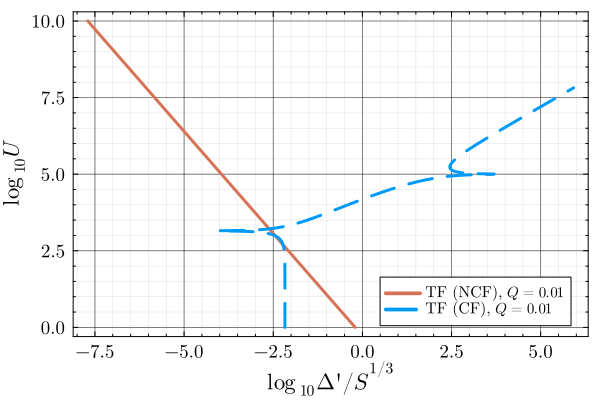

In [124]:
plot(log10.([abs(deltaprimeTF_NC(0.01, U)) for U in Uvals]), logU,
    line=(3,:solid),
    label=L"TF (NCF), $Q=0.01$",
    #xlims=(-4,4),
    #ylims=(-4, 0.2),
    #label="Exact Solution",
    legend=:best,
    # title=L"$\Delta '$ Comparison",
    xlabel=L"$\log_{10}\Delta'/S^{1/3}$",
    ylabel=L"$\log_{10}U$",
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,
    bottom_margin = 2 * Plots.mm
    )

plot!(log10.([abs(deltaprimeTF(0.01, U)) for U in Uvals]), logU,
    line=(3,:dash),
    label=L"TF (CF), $Q=0.01$",
)

In [ ]:
# does this mean the flow is stabilizing? (looking only at the orange)

In [119]:
# Initialize animation
#=
anim = @animate for i in 1:length(Uvals)
    p = plot(log10.([abs(deltaprimeTF(Q, 0)) for Q in Qvals]), logQ,
        line=(3, :solid),
        label=L"SM, Const-$\psi$",
        dpi = 300
    )

    U_str = @sprintf "%.1f" Uvals[i]  # Format Uvals[i] as a string with 2 decimal places

    plot!(Δ_TF_NC[:, i], logQ,
    line=(3, :solid),
    label=L"Two-Fluid, $U=$ %$" * U_str,  # Concatenate the formatted string
    dpi = 300
    )

    plot!(Δ_Coppi, logQ, line=(3, :dash), 
        xlims=(-4, 4),
        ylims=(-4, 0.2),
        label="SM, Exact",
        legend=:bottomright,
        title=L"$\Delta '$ Comparison (Non-Constant-$\psi$)",
        xlabel=L"$\log_{10}\Delta'/S^{1/3}$",
        ylabel=L"$\log_{10}Q$",
        titlefontsize=20,
        tickfontsize=12,
        legendfontsize=10,
        yguidefontsize=15,
        xguidefontsize=15,
        bottom_margin = 2 * Plots.mm,
        dpi=300
    )
end  # End animation loop

# Save animation as MP4
mp4(anim, "delta_prime_comparison_ncf.mp4", fps=30)
=#

In [36]:
# Initialize animation
anim = @animate for i in 1:length(Uvals)
    p = plot(log10.([abs(deltaprimeTF(Q, 0)) for Q in Qvals]), logQ,
        line=(3, :solid),
        label=L"SM, Const-$\psi$",
        dpi = 300
    )

    U_str = @sprintf "%.1f" Uvals[i]  # Format Uvals[i] as a string with 2 decimal places

    plot!(Δ_TF_C[:, i], logQ,
    line=(3, :solid),
    label=L"Two-Fluid, $U=$ %$" * U_str,  # Concatenate the formatted string
    dpi = 300
    )

    plot!(Δ_Coppi, logQ, line=(3, :dash), 
        xlims=(-4, 4),
        ylims=(-4, 0.2),
        label="SM, Exact",
        legend=:bottomright,
        title=L"$\Delta '$ Comparison (Constant-$\psi$)",
        xlabel=L"$\log_{10}\Delta'/S^{1/3}$",
        ylabel=L"$\log_{10}Q$",
        titlefontsize=20,
        tickfontsize=12,
        legendfontsize=10,
        yguidefontsize=15,
        xguidefontsize=15,
        bottom_margin = 2 * Plots.mm,
        dpi=300
    )
end  # End animation loop

# Save animation as MP4
mp4(anim, "delta_prime_comparison_cf.mp4", fps=30)

[ Info: Saved animation to /home/belster/JuliaFiles/Misc/delta_prime_comparison_cf.mp4


Plots.AnimatedGif("/home/belster/JuliaFiles/Misc/delta_prime_comparison_cf.mp4")

In [131]:
rel_err1 = abs.(log10.([abs(deltaprimeTF(Q, 0)) for Q in Qvals]) .- log10.([abs(deltaprimeTF(Q, 1)) for Q in Qvals]));

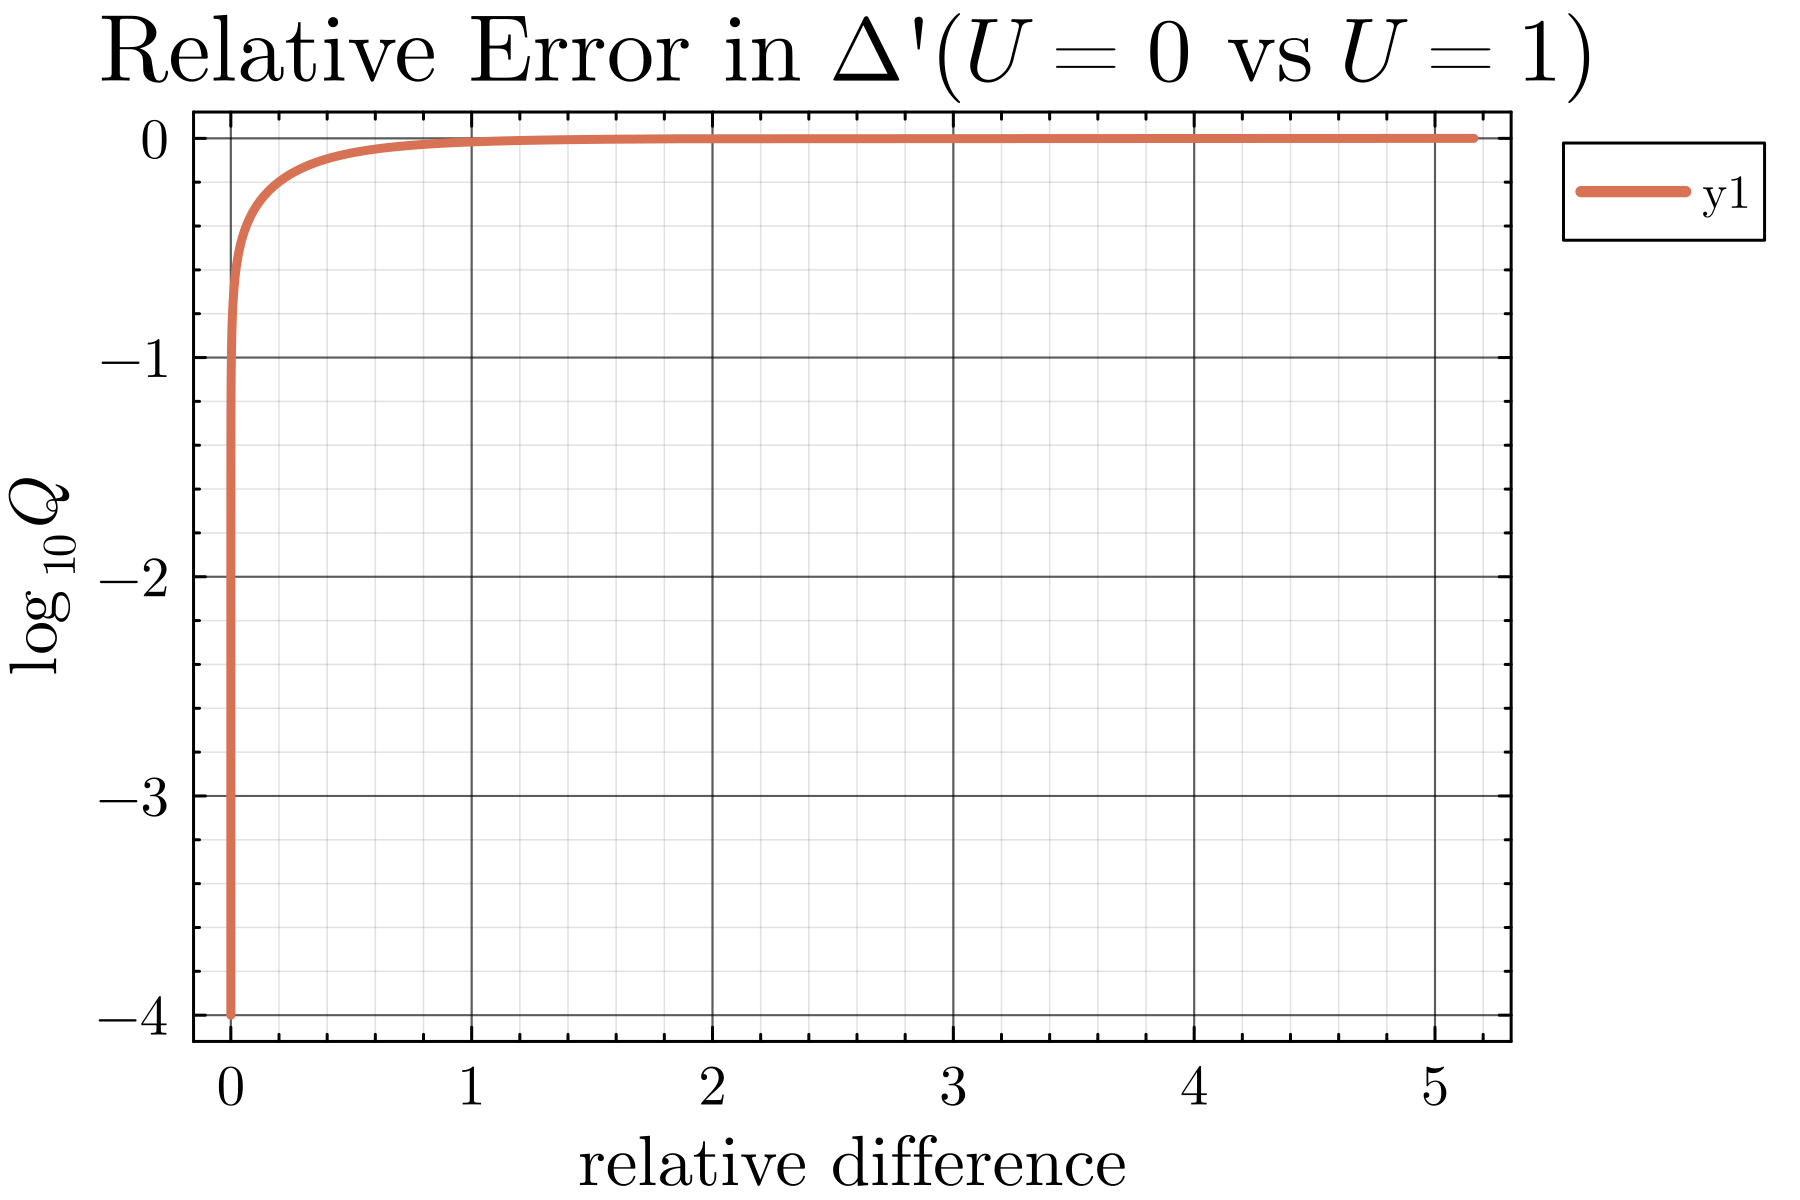

In [132]:
plot(rel_err1, logQ,
    line=(3,:solid),
    #xlims=(-4, 4),
    #ylims=(-4, 0.2),
    #label="SM, Exact",
    #legend=:best,
    title=L"Relative Error in $\Delta' (U=0$ vs $U=1)$",
    xlabel="relative difference",
    ylabel=L"$\log_{10}Q$",
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,
    #bottom_margin = 2 * Plots.mm,
    dpi=300 
    )

In [66]:
# The TF constant-flux approximation looks great until Q reaches about 10^(-0.8) by eye which is...

10^(-0.8)

0.15848931924611134

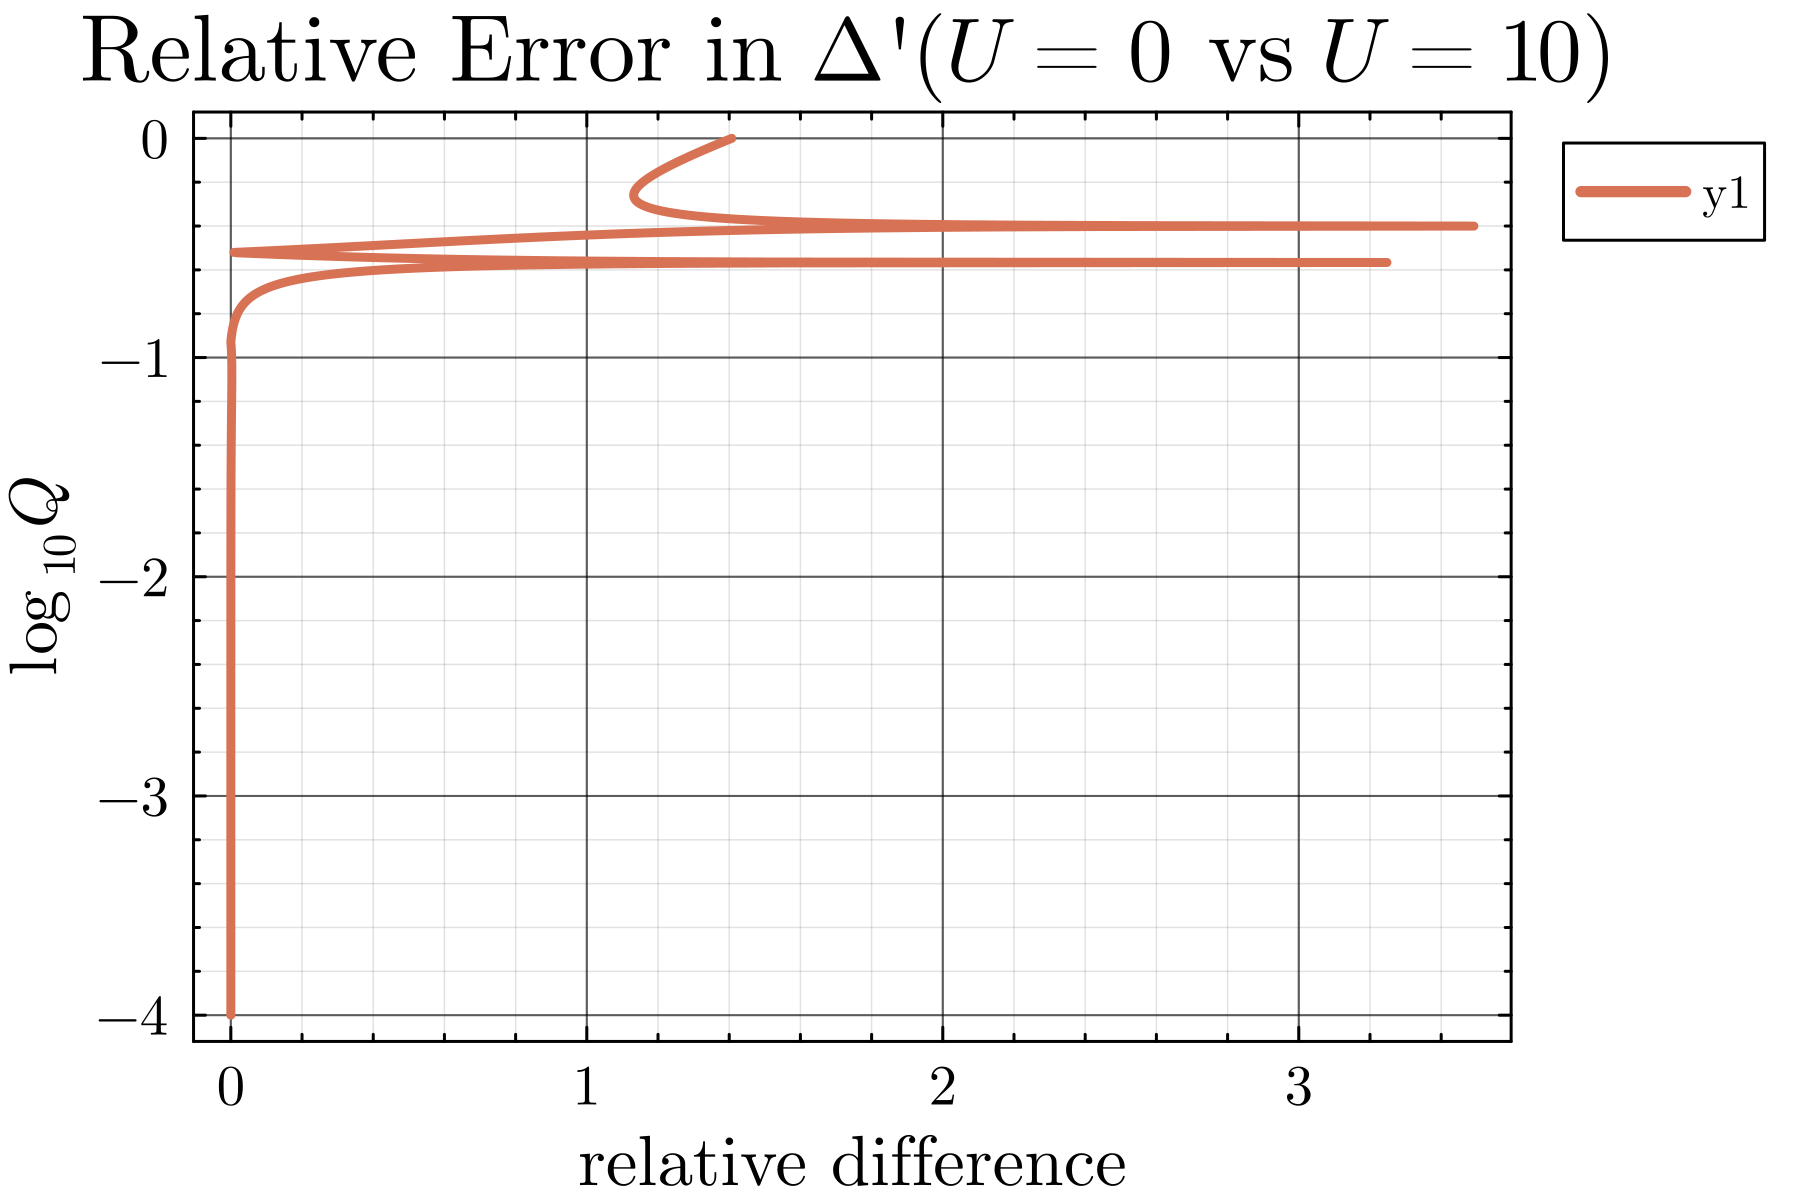

In [67]:
# but for higher values of U, the approximation breaks down. 
rel_err2 = abs.(log10.([abs(deltaprimeTF(Q, 10)) for Q in Qvals]) .- log10.([abs(deltaprimeTF(Q, 0)) for Q in Qvals]));

plot(rel_err2, logQ,
    line=(3,:solid),
    #xlims=(-4, 4),
    #ylims=(-4, 0.2),
    #label="SM, Exact",
    #legend=:best,
    title=L"Relative Error in $\Delta' (U=0$ vs $U=10)$",
    xlabel="relative difference",
    ylabel=L"$\log_{10}Q$",
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,
    #bottom_margin = 2 * Plots.mm,
    dpi=300 
    )

In [87]:
rel_err3 = abs.(log10.([abs(deltaprimeTF_NC(Q, 2)) for Q in Qvals]) .- Δ_Coppi);

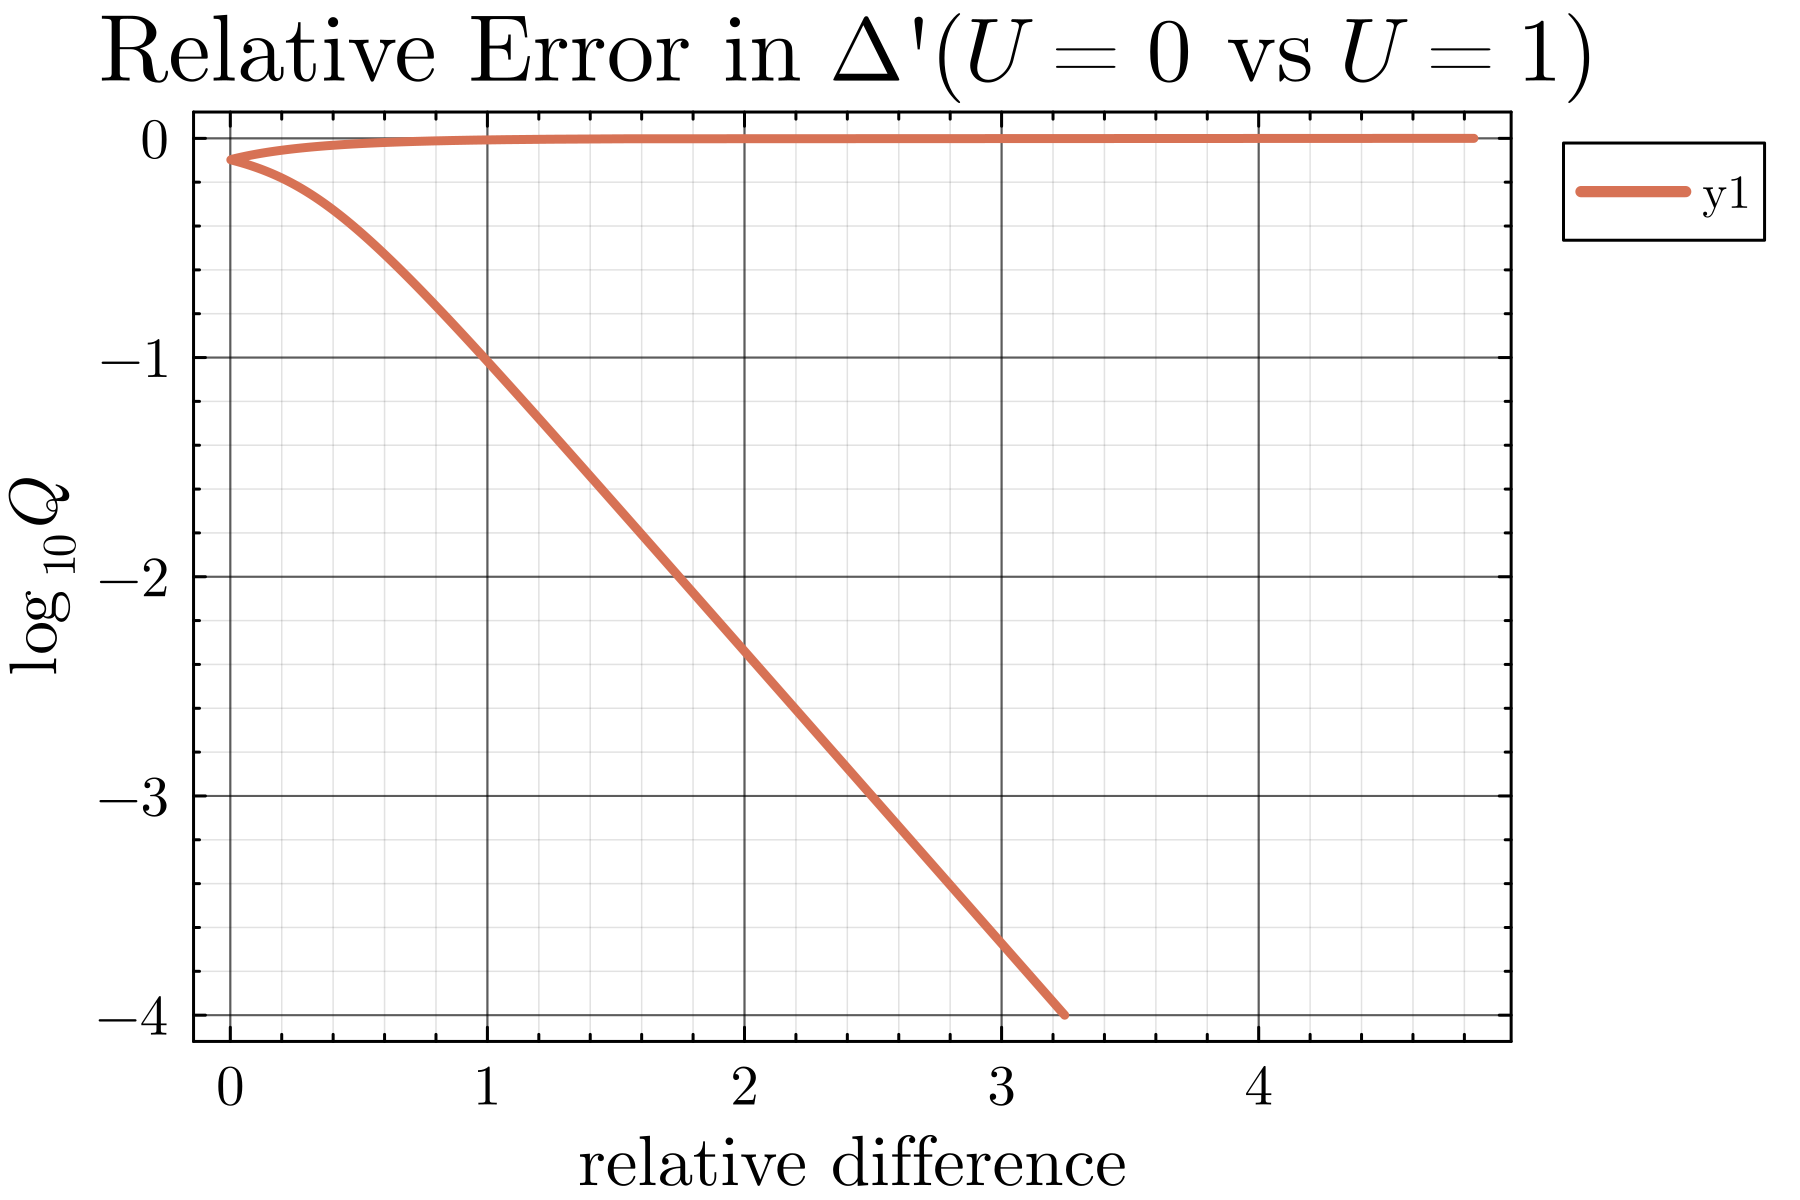

In [89]:
plot(rel_err3, logQ,
    line=(3,:solid),
    #xlims=(-4, 4),
    #ylims=(-4, 0.2),
    #label="SM, Exact",
    #legend=:best,
    title=L"Relative Error in $\Delta' (U=0$ vs $U=1)$",
    xlabel="relative difference",
    ylabel=L"$\log_{10}Q$",
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,
    #bottom_margin = 2 * Plots.mm,
    dpi=300 
    )

In [81]:
# why does the non-constant-flux approximation look so horrible?! Nooo!